## Table of Contents
[Part 1 - Basic Analysis](#Part-1---Basic-Analysis) <br>

[Part 2 - Statistical Analysis](#Part-2---Statistical-Analysis)

[Part 3 - Advanced Statistical Analysis](#Part-3---Advanced-Statistical-Analysis)

In [1]:
#importing pandas module

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm

In [2]:
#making the data frame

df = pd.read_csv('mosquito_data_part_2.csv')
df.head()

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.977738,-87.880969,9
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.798211,-87.736925,9
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.987245,-87.689417,9
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.953664,-87.724987,9
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,negative,CULEX RESTUANS,41.657069,-87.546049,9


In [85]:
#Confirming if there are any null values in the entire dataframe
df.isnull().sum().any()

False

In [86]:
#Confirming none of the columns are duplicated
print(f'Duplicated columns: {df.T.duplicated().any()}')

Duplicated columns: False


### Part 1 - Basic Analysis

<u>Question 1: Convert the `WNV Present` column into a binary column and create dummy variables from the `Trap Type` column<u>

<b>Question 1a:<b> Convert `WNV Present` column into a binary column

In [87]:
#We see all the data types for each column, WNV Present is an object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Trap             18495 non-null  object 
 4   Trap type        18495 non-null  object 
 5   Date             18495 non-null  object 
 6   Mosquito number  18495 non-null  int64  
 7   WNV Present      18495 non-null  object 
 8   Species          18495 non-null  object 
 9   Lat              18495 non-null  float64
 10  Lon              18495 non-null  float64
 11  Month            18495 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 1.7+ MB


In [88]:
#Converting WNV Present column into a binary column
df['WNV Present'] = np.where(df['WNV Present'] == 'positive', 1, 0)

In [89]:
#Checking the amount of instances mosquitos were positive and negative
#0 indicates negative and 1 indicates positive
df['WNV Present'].value_counts()

0    14501
1     3994
Name: WNV Present, dtype: int64

There are 14501 instances of mosquitos being negative and 3994 instances of them being positive in this data.

In [90]:
#Now we have converted WNV Present to int64 type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Trap             18495 non-null  object 
 4   Trap type        18495 non-null  object 
 5   Date             18495 non-null  object 
 6   Mosquito number  18495 non-null  int64  
 7   WNV Present      18495 non-null  int64  
 8   Species          18495 non-null  object 
 9   Lat              18495 non-null  float64
 10  Lon              18495 non-null  float64
 11  Month            18495 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 1.7+ MB


In [91]:
#Also the DataFrame shows the WNV Present column list 0's and 1's instead of a string value
df.head()

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.977738,-87.880969,9
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.798211,-87.736925,9
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.987245,-87.689417,9
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.953664,-87.724987,9
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,0,CULEX RESTUANS,41.657069,-87.546049,9


<b>Question 1b:<b> Create dummy variables from the `Trap Type` column

In [92]:
#Creating dummy variables from Trap Type column
dummy = pd.get_dummies(df['Trap type'])
dummy

,CDC,GRAVID,OVI,SENTINEL
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
18490,0,1,0,0
18491,0,1,0,0
18492,0,1,0,0
18493,0,0,0,1


In [93]:
#Since 1 represents when a trap type caught a mosquito and 0 resembles no capture
#we can list only 3 of the 4 trap types and deduce that if they all have 0's than the trap type not listed is
#the one that captured the mosquito for that row.
#I decided to drop OVI since that trap only recorded catching just one mosquito
trap_dummy = pd.get_dummies(df['Trap type']).iloc[:,[0, 1, 3]]
trap_dummy

,CDC,GRAVID,SENTINEL
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
18490,0,1,0
18491,0,1,0
18492,0,1,0
18493,0,0,1


In [94]:
#Add each trap type as a column
df = pd.concat([df, trap_dummy], axis = 1)
df.head()

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month,CDC,GRAVID,SENTINEL
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.977738,-87.880969,9,0,1,0
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.798211,-87.736925,9,0,1,0
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.987245,-87.689417,9,0,1,0
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.953664,-87.724987,9,0,1,0
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,0,CULEX RESTUANS,41.657069,-87.546049,9,0,1,0


<u>Question 2: What is the average number of mosquitoes for each month? What trends do you notice?<u>

In [95]:
# I grouped the dataframe by Month and the average amount of mosquitos caught for each month throughout the dataset.
m_avg = df.groupby(['Month'])['Mosquito number'].mean().reset_index()
m_avg

,Month,Mosquito number
0,5,2.761905
1,6,10.264442
2,7,11.551879
3,8,12.111321
4,9,8.394973
5,10,5.377778


The highest averages tended to be in June, July and August, which are the warmest months of the year. Mosquitos tend to be more prevelant when the temperature is hot outside.

### Part 2 - Statistical Analysis

<u>Question 1: Is there a statistically significant difference between the different mosquito species when looking at the occurrence of West Nile Virus?<u>

In [96]:
#I created a crosstable to calculate the sum of mosquitos that were positive and negative for each species type
species_sum = pd.crosstab(df['Species'], df['WNV Present'], values=df['Mosquito number'], aggfunc='sum')
species_sum

WNV Present,0,1
Species,,
CULEX PIPIENS,30156,31208
CULEX RESTUANS,83562,54024
CULEX SALINARIUS,433,31
CULEX TERRITANS,1776,34


0 indicates negative and 1 indicates positive

In [97]:
#I used the chi square test since this is best used for categorical data
val = stats.chi2_contingency(species_sum)
val

(3810.147349255034,
 0.0,
 3,
 array([[35352.36566215, 26011.63433785],
        [79264.56199062, 58321.43800938],
        [  267.31467419,   196.68532581],
        [ 1042.75767304,   767.24232696]]))

Our p-value is very low at 0.0, meaning that we can reject the null hypothesis that the type of species and WNV presence are independent. It appears that there is a significant relationship between species and WNV presence.

<u>Question 2: Which columns are positively correlated with the number of mosquitoes caught? Which columns are negatively correlated? Are these correlations statistically significant?<u>

In [98]:
#I used the corr function to see the correlation between the different columns
corr = df.corr()
corr

,Year,Week,Mosquito number,WNV Present,Lat,Lon,Month,CDC,GRAVID,SENTINEL
Year,1.000000,-0.023283,0.129326,0.153881,0.093983,-0.094628,-0.100847,-0.261514,0.155283,0.128327
Week,-0.023283,1.000000,-0.033900,0.174265,-0.002876,0.002967,0.948940,0.028723,-0.047021,0.043002
Mosquito number,0.129326,-0.033900,1.000000,0.408034,0.096820,-0.151421,-0.040426,0.094147,-0.138275,0.108575
WNV Present,0.153881,0.174265,0.408034,1.000000,0.110175,-0.163967,0.161334,0.002740,-0.027359,0.047073
Lat,0.093983,-0.002876,0.096820,0.110175,1.000000,-0.749416,-0.011544,-0.068795,0.067916,-0.017184
Lon,-0.094628,0.002967,-0.151421,-0.163967,-0.749416,1.000000,0.010695,0.060961,-0.081628,0.055548
Month,-0.100847,0.948940,-0.040426,0.161334,-0.011544,0.010695,1.000000,0.070174,-0.078398,0.035333
CDC,-0.261514,0.028723,0.094147,0.002740,-0.068795,0.060961,0.070174,1.000000,-0.844420,-0.018611
GRAVID,0.155283,-0.047021,-0.138275,-0.027359,0.067916,-0.081628,-0.078398,-0.844420,1.000000,-0.518582
SENTINEL,0.128327,0.043002,0.108575,0.047073,-0.017184,0.055548,0.035333,-0.018611,-0.518582,1.000000


<AxesSubplot:>

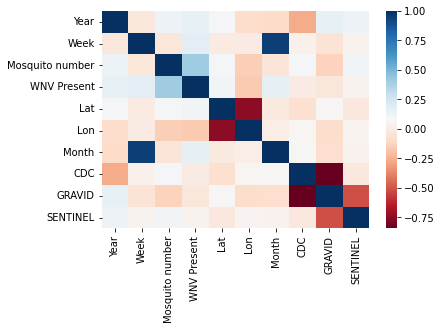

In [129]:
#I created a heatmap of the correlated tables for a visualization
h_map = sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, cmap = 'RdBu')
h_map

In [100]:
#I created a column that calculates correlation (r) and one that calculates P-value (p) for each column 
#in the dataset from mosquito number
corr_df = pd.DataFrame(columns=['r', 'p'])

for col in df:
    if pd.api.types.is_numeric_dtype(df[col]):
        r, p = stats.pearsonr(df['Mosquito number'], df[col])
        corr_df.loc[col] = [round(r, 3), round(p, 70)]
    
corr_df

,r,p
Year,0.129,8.000000e-70
Week,-0.034,4.002825e-06
Mosquito number,1.000,0.000000e+00
WNV Present,0.408,0.000000e+00
Lat,0.097,9.096861e-40
Lon,-0.151,0.000000e+00
Month,-0.040,3.803876e-08
CDC,0.094,1.095257e-37
GRAVID,-0.138,0.000000e+00
SENTINEL,0.109,1.289396e-49


In [101]:
#Creating independent and dependent variables
X = df[['Year', 'Week', 'WNV Present', 'Lat', 'Lon', 'Month', 'GRAVID', 'SENTINEL', 'CDC']] #independent
y = df['Mosquito number'] #dependent

In [102]:
#Here is the correlation and p-values of each column in sentence form
for col in X:
    correlation, p_value = stats.pearsonr(X[col], y)
    print(f"The correlation between mosquito number and {col} is {correlation} with p_value {round(p_value, 70)}.")

The correlation between mosquito number and Year is 0.129325945493711 with p_value 8e-70.
The correlation between mosquito number and Week is -0.033899607544960506 with p_value 4.0028248035812614e-06.
The correlation between mosquito number and WNV Present is 0.40803439689029825 with p_value 0.0.
The correlation between mosquito number and Lat is 0.09681989674648855 with p_value 9.096861337579254e-40.
The correlation between mosquito number and Lon is -0.1514211259689081 with p_value 0.0.
The correlation between mosquito number and Month is -0.04042643719660004 with p_value 3.8038755209713405e-08.
The correlation between mosquito number and GRAVID is -0.13827479127699194 with p_value 0.0.
The correlation between mosquito number and SENTINEL is 0.10857486046661327 with p_value 1.2893963696247897e-49.
The correlation between mosquito number and CDC is 0.09414701564247685 with p_value 1.0952570287564446e-37.


The p-value is very low for all columns meaning that we can reject the null hypothesis that the mosquito number and any of the columns in the dataframe are independent. There is a significant relationship between mosquito number and each of the columns in the dataset.

### Part 3 - Advanced Statistical Analysis

<u>Question 1: Run a linear regression to determine how the independent variables affect the number of mosquitoes caught.<u>

In [103]:
#Running the correlation chart again for reference
df.corr()

,Year,Week,Mosquito number,WNV Present,Lat,Lon,Month,CDC,GRAVID,SENTINEL
Year,1.000000,-0.023283,0.129326,0.153881,0.093983,-0.094628,-0.100847,-0.261514,0.155283,0.128327
Week,-0.023283,1.000000,-0.033900,0.174265,-0.002876,0.002967,0.948940,0.028723,-0.047021,0.043002
Mosquito number,0.129326,-0.033900,1.000000,0.408034,0.096820,-0.151421,-0.040426,0.094147,-0.138275,0.108575
WNV Present,0.153881,0.174265,0.408034,1.000000,0.110175,-0.163967,0.161334,0.002740,-0.027359,0.047073
Lat,0.093983,-0.002876,0.096820,0.110175,1.000000,-0.749416,-0.011544,-0.068795,0.067916,-0.017184
Lon,-0.094628,0.002967,-0.151421,-0.163967,-0.749416,1.000000,0.010695,0.060961,-0.081628,0.055548
Month,-0.100847,0.948940,-0.040426,0.161334,-0.011544,0.010695,1.000000,0.070174,-0.078398,0.035333
CDC,-0.261514,0.028723,0.094147,0.002740,-0.068795,0.060961,0.070174,1.000000,-0.844420,-0.018611
GRAVID,0.155283,-0.047021,-0.138275,-0.027359,0.067916,-0.081628,-0.078398,-0.844420,1.000000,-0.518582
SENTINEL,0.128327,0.043002,0.108575,0.047073,-0.017184,0.055548,0.035333,-0.018611,-0.518582,1.000000


In [104]:
#Since I discovered there is a significant relationship between species type and WNV presence
#I figured species would be a good column to convert into dummy variables to evaluate further 
#correlations with mosquito number.

In [105]:
#Creating dummy values for Species
s_dum = pd.get_dummies(df['Species'])
s_dum

,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
18490,1,0,0,0
18491,1,0,0,0
18492,0,1,0,0
18493,0,1,0,0


In [106]:
#Similiar to providing dummy values for trap type in Part 1, I decided to only display 3 of the 4 types of species.
#The number 1 represents when a captured mosquito is from a particular species and 0 resembles that 
#it's not from that species. We only need to list 3 of the 4 trap types and deduce that if they all have 0's 
#than the species not listed is the one that the mosquito belongs to. I decided to not include CULEX SALINARIUS 
#because they had the fewest sample size.
spec_dummy = pd.get_dummies(df['Species']).iloc[:, [0, 1, 3]]
spec_dummy

,CULEX PIPIENS,CULEX RESTUANS,CULEX TERRITANS
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
18490,1,0,0
18491,1,0,0
18492,0,1,0
18493,0,1,0


In [107]:
#Combining the new dummy columns to the dataframe
df = pd.concat([df, spec_dummy], axis = 1)
df.head()

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month,CDC,GRAVID,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX TERRITANS
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.977738,-87.880969,9,0,1,0,0,1,0
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.798211,-87.736925,9,0,1,0,0,1,0
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.987245,-87.689417,9,0,1,0,0,1,0
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.953664,-87.724987,9,0,1,0,0,1,0
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,0,CULEX RESTUANS,41.657069,-87.546049,9,0,1,0,0,1,0


In [108]:
#I decided to clean the data and drop the columns that I don't believe provide useful info.
X = df.drop(columns=['Week', 'Address Block', 'Trap', 'Trap type', 
            'Date', 'Lat', 'Lon'])
X.head()

,Year,Mosquito number,WNV Present,Species,Month,CDC,GRAVID,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX TERRITANS
0,2019,2,0,CULEX RESTUANS,9,0,1,0,0,1,0
1,2019,1,0,CULEX RESTUANS,9,0,1,0,0,1,0
2,2019,2,0,CULEX RESTUANS,9,0,1,0,0,1,0
3,2019,1,0,CULEX RESTUANS,9,0,1,0,0,1,0
4,2019,9,0,CULEX RESTUANS,9,0,1,0,0,1,0


Address Block, Trap and Date don't offer any binary information, so they offer nothing useful. Trap type can be removed since we added the dummy variables for each of the individual trap types, so that column is unnecessary. Latitude and Longitude display locations that are all fairly close to one another , so it's difficult to gather any useful information about mosquitos when all the data is in close proximity to one another. 

I also removed the Week column since we already have Year and Month and decided those are sufficient enough to gather data about the time period these mosquitos were being studied and thought Week was superfluous.

In [109]:
#Creating independent and dependent variables
X = df[['Year', 'Month', 'GRAVID', 'SENTINEL', 'CDC', 'CULEX RESTUANS', 
        'CULEX PIPIENS', 'CULEX TERRITANS']] #independent
y = df['Mosquito number'] #dependent

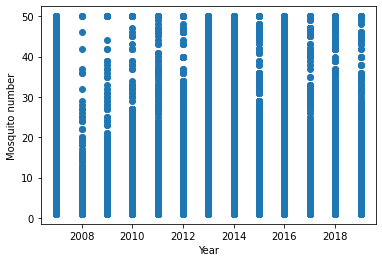

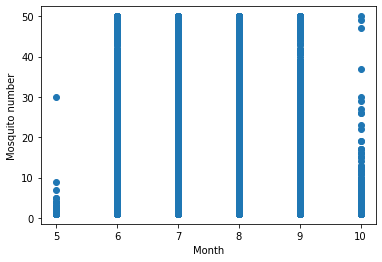

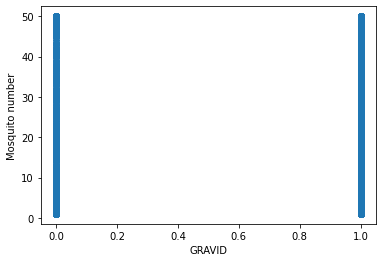

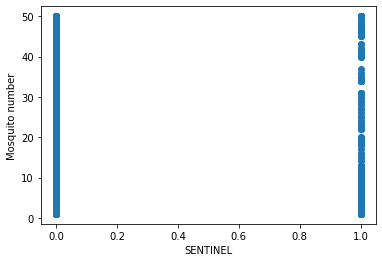

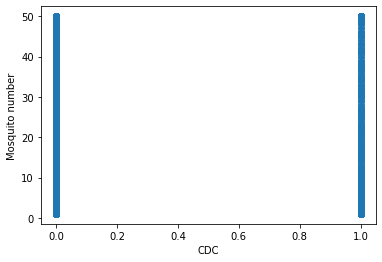

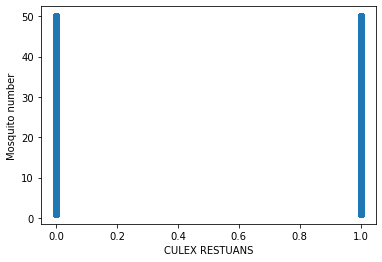

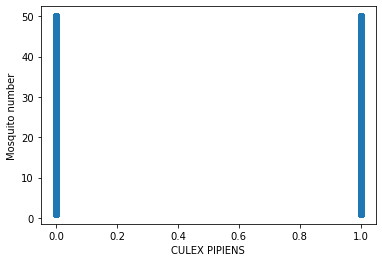

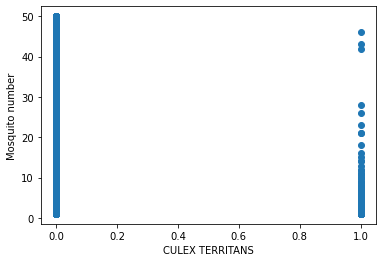

In [110]:
#Using a loop to make plots for each column in comparison to the mosquito number
for col in X.columns: 
    plt.figure()
    plt.scatter(X[col], y)
    plt.ylabel('Mosquito number')
    plt.xlabel(col)
    plt.show();

The plots above does not seem like any data is linear at all.

Running the Linear Regression

In [111]:
#Add constant
X_const = sm.add_constant(X)

# Instantiate
m_model = sm.OLS(y, X_const)

# Fit
results = m_model.fit()

# Looking at the summary
results.summary()

/Users/allanisla/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     178.9
Date:                Sat, 02 Apr 2022   Prob (F-statistic):          2.31e-292
Time:                        18:49:03   Log-Likelihood:                -73656.
No. Observations:               18495   AIC:                         1.473e+05
Df Residuals:                   18486   BIC:                         1.474e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1158.1028     58.440    -19.817      0.000   -1272.651   -1043.555
Year                0.5747      0.028     20.240      0.000       0.519       0.630
Month              -0.6403      0.102     -6.278      0.000      -0.840      -0.440
GRAVID              8.5160     12.988      0.656      0.512     -16.942      33.974
SENTINEL           20.1843     13.022      1.550      0.121      -5.340      45.708
CDC                19.1536     12.999      1.473      0.141      -6.325      44.632
CULEX RESTUANS      8.3109      0.877      9.478      0.000       6.592      10.030
CULEX PIPIENS       9.5858      0.884     10.849      0.000       7.854      11.318
CULEX TERRITANS    -0.4447      0.967     -0.460      0.646      -2.340       1.451
==============================================================================
Omnibus:                     4634.110   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9263.053
Skew:                           1.535   Prob(JB):                         0.00
Kurtosis:                       4.612   Cond. No.                     1.24e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Based on the p-values associated with every variable, we can see that all three trap types and CULEX TERRITANS don't seem significant in predicting the number of mosquitos caught since their p-values are > 0.05.

In contrast, the Year, Month, CULEX RESTUANS and PIPIENS seem to be very significant (p-value is 0).

The interpretations for each variable are as follows: Assuming all other variables stay constant (very important!),

* With one unit increase in Year, there is a 0.5747 increase in the mosquitos caught
* With one unit increase in Month, there is a 0.6403 decrease in the mosquitos caught
* With one unit increase in the distribution of the GRAVID trap, there is a 8.5160 increase in the mosquitos caught
* With one unit increase in the distribution of the SENTINEL trap, there is a 20.1843 increase in the mosquitos caught
* With one unit increase in the distribution of the CDC trap, there is a 19.1536 increase in the mosquitos caught
* With one unit increase in CULEX RESTUANS, there is a 8.3109 increase in the mosquitos caught
* With one unit increase in CULEX PIPIENS, there is a 9.5858 increase in the mosquitos caught
* With one unit increase in CULEX TERRITANS, there is a 0.4447 decrease in the mosquitos caught

The interpretation of the intercept here is not possible. This is because the value is negative, which is not a possible rate to have.

In [112]:
#Now that linear regression has been run, we check to see if residuals are distributed normally.

In [113]:
m_resids = results.resid # this is where the residuals are stored

m_fittedvals = results.fittedvalues # this is where the fitted values are stored

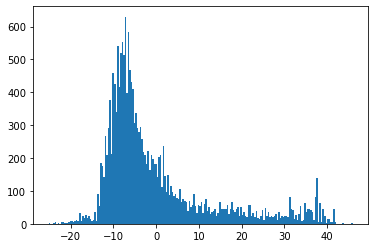

In [114]:
#Histogram of the residuals
plt.figure()
plt.hist(m_resids, bins = 200)
plt.show()

The histogram is skewed, showing heavy residuals between -15 and 5 and several in the 30-40 range

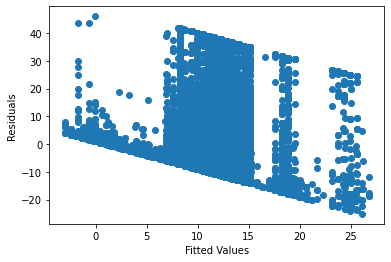

In [115]:
#Scatter plot of the residuals
plt.figure()
plt.scatter(m_fittedvals, m_resids)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

The scatterplot does not look normal, many of the plots are above or below 0 indicating lack of normalcy.

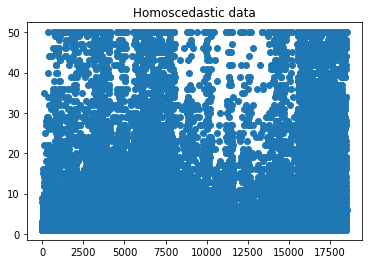

In [116]:
plt.scatter(y.index, y)
plt.title('Homoscedastic data')

plt.show()

The homoscedastic data is too spread out to make any predictions.

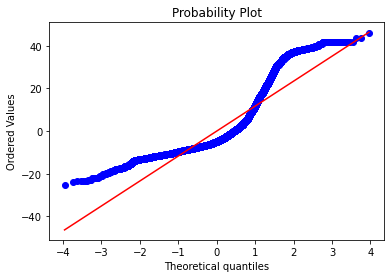

In [117]:
#Run the Q-Q plot test
stats.probplot(m_resids, dist="norm", plot=plt);

The above graph shows the line is skewed, that means our data is not normal.

In [118]:
#Run the Shapiro-Wilk test to check normalcy
print('Shapiro-Wilk test:', stats.shapiro(m_resids))

Shapiro-Wilk test: ShapiroResult(statistic=0.8131046295166016, pvalue=0.0)


/Users/allanisla/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


We received a low p-value, so we can reject the null hypothesis and conclude that our data is not normally distributed.

Since our residuals do not appear to be normally distributed, this means that our regression model does not explain all trends in the dataset.

Question 2: Run a logistic regression to determine how the independent variables affect West Nile Virus presence.

In [119]:
#Running the correlation chart again for reference
df.corr()

,Year,Week,Mosquito number,WNV Present,Lat,Lon,Month,CDC,GRAVID,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX TERRITANS
Year,1.000000,-0.023283,0.129326,0.153881,0.093983,-0.094628,-0.100847,-0.261514,0.155283,0.128327,-0.347588,0.343895,0.005373
Week,-0.023283,1.000000,-0.033900,0.174265,-0.002876,0.002967,0.948940,0.028723,-0.047021,0.043002,0.316788,-0.315605,0.036645
Mosquito number,0.129326,-0.033900,1.000000,0.408034,0.096820,-0.151421,-0.040426,0.094147,-0.138275,0.108575,0.014730,0.070999,-0.150962
WNV Present,0.153881,0.174265,0.408034,1.000000,0.110175,-0.163967,0.161334,0.002740,-0.027359,0.047073,0.065388,-0.001498,-0.111394
Lat,0.093983,-0.002876,0.096820,0.110175,1.000000,-0.749416,-0.011544,-0.068795,0.067916,-0.017184,-0.052372,0.076660,-0.056925
Lon,-0.094628,0.002967,-0.151421,-0.163967,-0.749416,1.000000,0.010695,0.060961,-0.081628,0.055548,0.021916,-0.055278,0.078145
Month,-0.100847,0.948940,-0.040426,0.161334,-0.011544,0.010695,1.000000,0.070174,-0.078398,0.035333,0.330760,-0.327509,0.032683
CDC,-0.261514,0.028723,0.094147,0.002740,-0.068795,0.060961,0.070174,1.000000,-0.844420,-0.018611,0.158779,-0.150160,-0.022071
GRAVID,0.155283,-0.047021,-0.138275,-0.027359,0.067916,-0.081628,-0.078398,-0.844420,1.000000,-0.518582,-0.109750,0.098497,0.028193
SENTINEL,0.128327,0.043002,0.108575,0.047073,-0.017184,0.055548,0.035333,-0.018611,-0.518582,1.000000,-0.049268,0.056440,-0.017349


In [120]:
#Making a visualization for the correlated chart
df.corr().style.background_gradient()

,Year,Week,Mosquito number,WNV Present,Lat,Lon,Month,CDC,GRAVID,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX TERRITANS
Year,1.000000,-0.023283,0.129326,0.153881,0.093983,-0.094628,-0.100847,-0.261514,0.155283,0.128327,-0.347588,0.343895,0.005373
Week,-0.023283,1.000000,-0.033900,0.174265,-0.002876,0.002967,0.948940,0.028723,-0.047021,0.043002,0.316788,-0.315605,0.036645
Mosquito number,0.129326,-0.033900,1.000000,0.408034,0.096820,-0.151421,-0.040426,0.094147,-0.138275,0.108575,0.014730,0.070999,-0.150962
WNV Present,0.153881,0.174265,0.408034,1.000000,0.110175,-0.163967,0.161334,0.002740,-0.027359,0.047073,0.065388,-0.001498,-0.111394
Lat,0.093983,-0.002876,0.096820,0.110175,1.000000,-0.749416,-0.011544,-0.068795,0.067916,-0.017184,-0.052372,0.076660,-0.056925
Lon,-0.094628,0.002967,-0.151421,-0.163967,-0.749416,1.000000,0.010695,0.060961,-0.081628,0.055548,0.021916,-0.055278,0.078145
Month,-0.100847,0.948940,-0.040426,0.161334,-0.011544,0.010695,1.000000,0.070174,-0.078398,0.035333,0.330760,-0.327509,0.032683
CDC,-0.261514,0.028723,0.094147,0.002740,-0.068795,0.060961,0.070174,1.000000,-0.844420,-0.018611,0.158779,-0.150160,-0.022071
GRAVID,0.155283,-0.047021,-0.138275,-0.027359,0.067916,-0.081628,-0.078398,-0.844420,1.000000,-0.518582,-0.109750,0.098497,0.028193
SENTINEL,0.128327,0.043002,0.108575,0.047073,-0.017184,0.055548,0.035333,-0.018611,-0.518582,1.000000,-0.049268,0.056440,-0.017349


In [121]:
#Dropping columns that aren't necessary
X1 = df.drop(columns=["Week", 'Address Block', 'Trap', 'Trap type', 'Date', "Lat", "Lon", 'WNV Present'])
X1

,Year,Mosquito number,Species,Month,CDC,GRAVID,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX TERRITANS
0,2019,2,CULEX RESTUANS,9,0,1,0,0,1,0
1,2019,1,CULEX RESTUANS,9,0,1,0,0,1,0
2,2019,2,CULEX RESTUANS,9,0,1,0,0,1,0
3,2019,1,CULEX RESTUANS,9,0,1,0,0,1,0
4,2019,9,CULEX RESTUANS,9,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
18490,2016,4,CULEX PIPIENS,9,0,1,0,1,0,0
18491,2007,19,CULEX PIPIENS,8,0,1,0,1,0,0
18492,2016,34,CULEX RESTUANS,7,0,1,0,0,1,0
18493,2017,50,CULEX RESTUANS,8,0,0,1,0,1,0


I dropped the columns I felt weren't necessary as explained when answering the previous question. I also dropped the  WNV Present column since that will be the y variable

In [122]:
X1.corr().style.background_gradient()

,Year,Mosquito number,Month,CDC,GRAVID,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX TERRITANS
Year,1.000000,0.129326,-0.100847,-0.261514,0.155283,0.128327,-0.347588,0.343895,0.005373
Mosquito number,0.129326,1.000000,-0.040426,0.094147,-0.138275,0.108575,0.014730,0.070999,-0.150962
Month,-0.100847,-0.040426,1.000000,0.070174,-0.078398,0.035333,0.330760,-0.327509,0.032683
CDC,-0.261514,0.094147,0.070174,1.000000,-0.844420,-0.018611,0.158779,-0.150160,-0.022071
GRAVID,0.155283,-0.138275,-0.078398,-0.844420,1.000000,-0.518582,-0.109750,0.098497,0.028193
SENTINEL,0.128327,0.108575,0.035333,-0.018611,-0.518582,1.000000,-0.049268,0.056440,-0.017349
CULEX PIPIENS,-0.347588,0.014730,0.330760,0.158779,-0.109750,-0.049268,1.000000,-0.868829,-0.148322
CULEX RESTUANS,0.343895,0.070999,-0.327509,-0.150160,0.098497,0.056440,-0.868829,1.000000,-0.305582
CULEX TERRITANS,0.005373,-0.150962,0.032683,-0.022071,0.028193,-0.017349,-0.148322,-0.305582,1.000000


In [123]:
#The independent variables
X1 = df[['Year', 'Month', 'Mosquito number', 'GRAVID', 'SENTINEL', 'CDC', 'CULEX RESTUANS', 
        'CULEX PIPIENS', 'CULEX TERRITANS']]
#The dependent variable
y1 = df['WNV Present']

In [124]:
#Adding intercept
X_withconstant = sm.add_constant(X1)
X_withconstant.head()

/Users/allanisla/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,Year,Month,Mosquito number,GRAVID,SENTINEL,CDC,CULEX RESTUANS,CULEX PIPIENS,CULEX TERRITANS
0,1.0,2019,9,2,1,0,0,1,0,0
1,1.0,2019,9,1,1,0,0,1,0,0
2,1.0,2019,9,2,1,0,0,1,0,0
3,1.0,2019,9,1,1,0,0,1,0,0
4,1.0,2019,9,9,1,0,0,1,0,0


In [125]:
# Fitting the model 

# 1. Instantiate model
mylogreg= sm.Logit(y1,X_withconstant)

# 2. Fit model
mylogreg_results = mylogreg.fit()

# Look at summary
mylogreg_results.summary()

         Current function value: 0.411752
         Iterations: 35


/Users/allanisla/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV Present   No. Observations:                18495
Model:                          Logit   Df Residuals:                    18485
Method:                           MLE   Df Model:                            9
Date:                Sat, 02 Apr 2022   Pseudo R-squ.:                  0.2108
Time:                        18:49:08   Log-Likelihood:                -7615.4
converged:                      False   LL-Null:                       -9649.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -275.4119   6323.190     -0.044      0.965   -1.27e+04    1.21e+04
Year                0.1262      0.007     18.923      0.000       0.113       0.139
Month               0.6189      0.024     25.688      0.000       0.572       0.666
Mosquito number     0.0669      0.001     46.527      0.000       0.064       0.070
GRAVID             13.7338   6323.176      0.002      0.998   -1.24e+04    1.24e+04
SENTINEL           13.0794   6323.176      0.002      0.998   -1.24e+04    1.24e+04
CDC                13.3410   6323.176      0.002      0.998   -1.24e+04    1.24e+04
CULEX RESTUANS      0.6464      0.321      2.012      0.044       0.017       1.276
CULEX PIPIENS       0.9287      0.322      2.885      0.004       0.298       1.560
CULEX TERRITANS    -1.6388      0.419     -3.910      0.000      -2.460      -0.817
===================================================================================
"""

Looking at the p-values, all the independent variables were significant in predicting WNV Present except the constant coefficient and each of the Trap Types. Looking at the model coefficients:

In [126]:
coeffs_df = pd.DataFrame({"coef": mylogreg_results.params, "odds_ratio": np.exp(mylogreg_results.params)})
coeffs_df

,coef,odds_ratio
const,-275.411875,2.455514e-120
Year,0.126158,1.134461e+00
Month,0.618915,1.856912e+00
Mosquito number,0.066926,1.069217e+00
GRAVID,13.733752,9.214944e+05
SENTINEL,13.079431,4.789881e+05
CDC,13.341031,6.222090e+05
CULEX RESTUANS,0.646447,1.908746e+00
CULEX PIPIENS,0.928708,2.531238e+00
CULEX TERRITANS,-1.638777,1.942175e-01


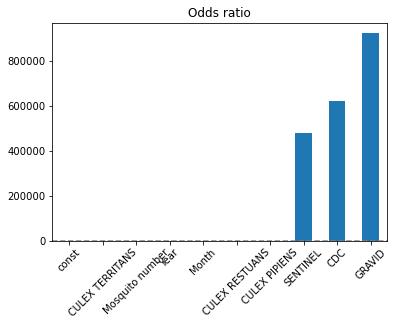

In [127]:
coeffs_df["odds_ratio"].sort_values().plot(kind="bar")
plt.axhline(y=1, c="gray", linestyle="--")
plt.title("Odds ratio")
plt.xticks(rotation=45)
plt.show()

The odds ratio for `GRAVID` tells us that with 1 unit increase in this column, a mosquito's odds of being WNV positive increases by a factor of 9.2149. Interestingly, the odds ratio for mosquito number is less than 1 indicating that  more mosquitos corresponds to lower odds for WNV. 

Finally, we can calculate the models accuracy with a standard 0.5 cutoff:

In [128]:
# Calculate the accuracy

df['y_pred'] = mylogreg_results.predict(X_withconstant)
np.mean((df['y_pred'] >= 0.5) == df['WNV Present'])

0.8102189781021898

Some of the limitations that we run into are that each trap caught significantly different amounts of mosquitos and some species were significantly more prevelant than others. There might not be as much data for some traps or some species as other types. 

Some of the species could come from different parts of the world that could be more exposed to WNV than other species. Also, some months or years could see different amounts of mosquitos depending on things such as temperature and global warming, so their presence can be affected by those factors.